In [1]:
pip install tensorrt --no-cache-dir --user

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-10.0.1-py2.py3-none-any.whl size=16333 sha256=7eaef45912d843d8910887a13f05a27e8c58d0f92e0c65c40fd638af7cd7006b
  Stored in directory: /tmp/pip-ephem-wheel-cache-h8jalubw/wheels/31/90/ef/53ad98d9a1bd660c0177aa1ea91bde288edfbe4d15621ca472
  Created wheel for tensorrt-cu12: filename=tensorrt_cu12-10.0.1-py2.py3-none-any.whl size=17549 sha256=f3769b994a2cd1c9f871f3513fbdb6351d56f672db3a4f2cc79ee245c59717e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-h8jalubw/wheels/c5/08/30/a058eaf14eeeabb3799e3abd3a2a534649123824dcd9695876
Successfully built tensorrt tensorrt-cu12
Note: you may need to restart the kernel to use updated packages.


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6950 - loss: 0.5954 - val_accuracy: 0.8493 - val_loss: 0.3959
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8895 - loss: 0.3374 - val_accuracy: 0.8803 - val_loss: 0.3162
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9233 - loss: 0.2460 - val_accuracy: 0.8896 - val_loss: 0.2824
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9354 - loss: 0.1993 - val_accuracy: 0.8875 - val_loss: 0.2762
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9466 - loss: 0.1644 - val_accuracy: 0.8856 - val_loss: 0.2818
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9605 - loss: 0.1363 - val_accuracy: 0.8827 - val_loss: 0.2921
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9651 - loss: 0.1166 - val_accuracy: 0.8840 - val_loss: 0.2944
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9744 - loss: 0.0951 - val_accuracy: 0.8765 - v

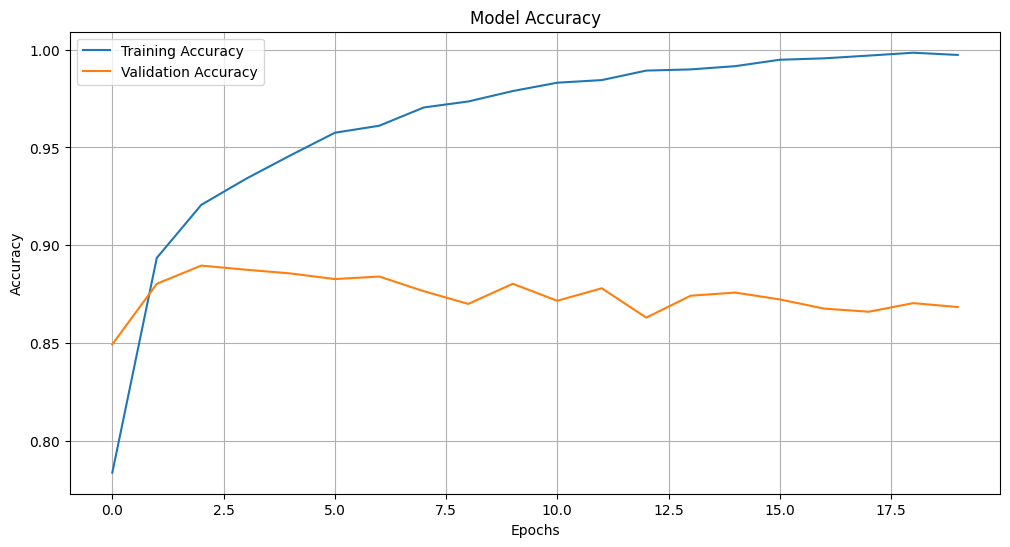

In [2]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import imdb

from matplotlib import pyplot as plt
import numpy as np


def sigma(x):
    return 1 / (1 + np.exp(-1 * x))

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
K = 10
z = np.random.randint(0, high=100, size=K, dtype=int)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))
history_dict = history.history

train_accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

accuracy = history_dict['accuracy']
epochs = range(0, len(accuracy))

plt.figure(figsize = (12, 6))
plt.plot(epochs, train_accuracy_values, 'tab:blue', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'tab:orange', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

The model accuracy significantly improved with using the sigmoid function versus the softmax function. Clearly, this graph shows that the training accuracy follows a logarithmic yet still positive slope curve, reaching very close to 1.00. The sigmoid function is better than the softmax function in this case as it allows outputs in the range [0, 1], while the softmax function only outputs the discrete binary values of 0 or 1.